In [1]:
!pip install scanpy anndata matplotlib seaborn


In [16]:
import scanpy as sc
import pandas as pd
from scipy.io import mmread
from anndata import AnnData
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read  Normals

In [17]:


X = mmread(r"sngel_cell_data\normal\matrix.mtx.gz").T.tocsr() 
genes = pd.read_csv(r"sngel_cell_data\normal\features.tsv.gz", header=None, sep="\t")
barcodes = pd.read_csv(r"sngel_cell_data\normal\barcodes.tsv.gz", header=None)

normal_data = AnnData(X)
normal_data.var_names = genes[1] 
normal_data.obs_names = barcodes[0]


In [18]:
normal_data.var

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.4, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, AL669831.5, FAM87B, LINC00115, FAM41C, AL645608.7, AL645608.3, AL645608.5, AL645608.1, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.8, HES4, ISG15, AL645608.2, AGRN, AL645608.9, RNF223, C1orf159, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20, AL391244.3, ANKRD65, AL391244.2, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, MORN1, RER1, PEX10, PLCH2, AL139246.1, AL139246.4, PANK4, HES5, ...]

[33538 rows x 0 columns]

Read  Case

In [19]:

X = mmread(r"sngel_cell_data\cancer\matrix.mtx.gz").T.tocsr()  
genes = pd.read_csv(r"sngel_cell_data\cancer\features.tsv.gz", header=None, sep="\t")
barcodes = pd.read_csv(r"sngel_cell_data\cancer\barcodes.tsv.gz", header=None)

cancer_data = AnnData(X)
cancer_data.var_names = genes[1] 
cancer_data.obs_names = barcodes[0]


In [20]:
cancer_data.var

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.4, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, AL669831.5, FAM87B, LINC00115, FAM41C, AL645608.7, AL645608.3, AL645608.5, AL645608.1, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.8, HES4, ISG15, AL645608.2, AGRN, AL645608.9, RNF223, C1orf159, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20, AL391244.3, ANKRD65, AL391244.2, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, MORN1, RER1, PEX10, PLCH2, AL139246.1, AL139246.4, PANK4, HES5, ...]

[33538 rows x 0 columns]

Concatenate Normal and Case

In [21]:

normal_data.var_names_make_unique()

normal_data.obs["condition"] = "normal"
cancer_data.var_names_make_unique() 
cancer_data.obs["condition"] = "cancer"



data = normal_data.concatenate(cancer_data, batch_categories = ["N", "C"])
data

C:\Users\sahar\AppData\Local\Temp\ipykernel_13244\3206179280.py:9: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  data = normal_data.concatenate(cancer_data, batch_categories = ["N", "C"])


AnnData object with n_obs √ó n_vars = 12816 √ó 33538
    obs: 'condition', 'batch'

In [22]:
data.obs

condition batch
AAACCTGAGACTAGGC-1-N    normal     N
AAACCTGAGGACAGAA-1-N    normal     N
AAACCTGAGGATGTAT-1-N    normal     N
AAACCTGCAAGAGGCT-1-N    normal     N
AAACCTGGTAGCTTGT-1-N    normal     N
...                        ...   ...
TTTGTCATCGAGAACG-1-C    cancer     C
TTTGTCATCGCCAGCA-1-C    cancer     C
TTTGTCATCGGCGCAT-1-C    cancer     C
TTTGTCATCGGTCTAA-1-C    cancer     C
TTTGTCATCTACCAGA-1-C    cancer     C

[12816 rows x 2 columns]

In [23]:
data.var

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.4, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, AL669831.5, FAM87B, LINC00115, FAM41C, AL645608.7, AL645608.3, AL645608.5, AL645608.1, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.8, HES4, ISG15, AL645608.2, AGRN, AL645608.9, RNF223, C1orf159, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20, AL391244.3, ANKRD65, AL391244.2, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, MORN1, RER1, PEX10, PLCH2, AL139246.1, AL139246.4, PANK4, HES5, ...]

[33538 rows x 0 columns]

In [24]:
data.X.shape

(12816, 33538)

Quality Control

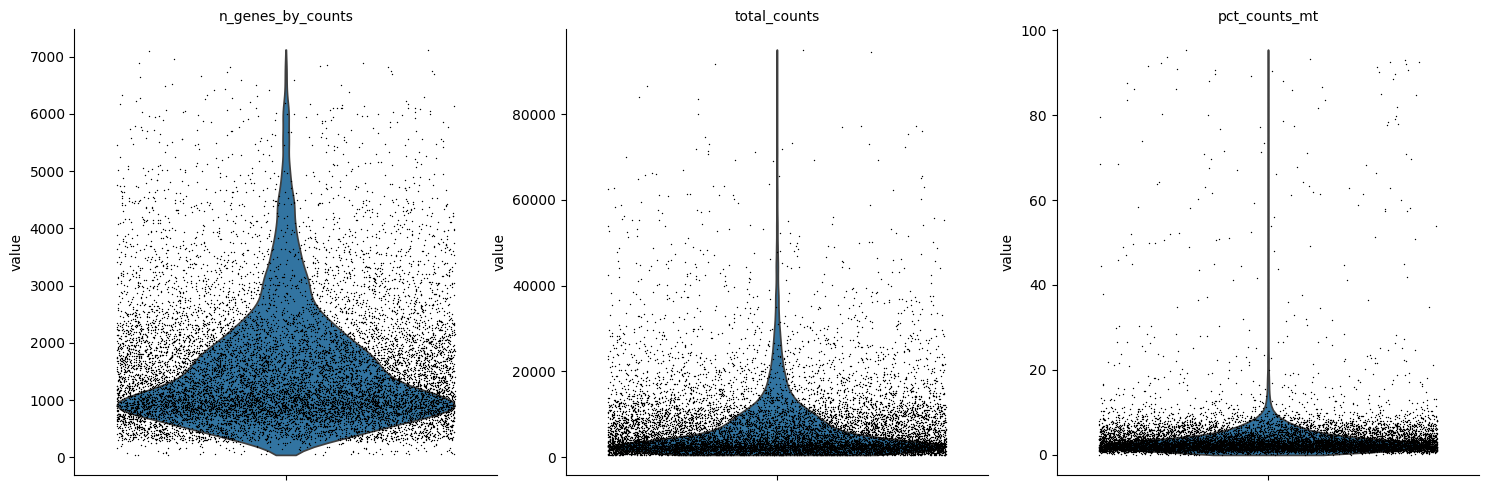

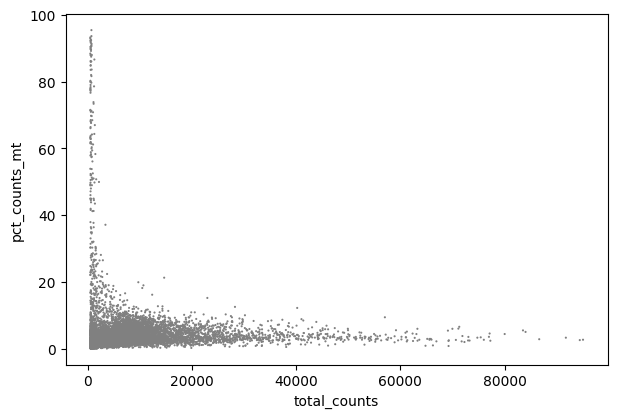

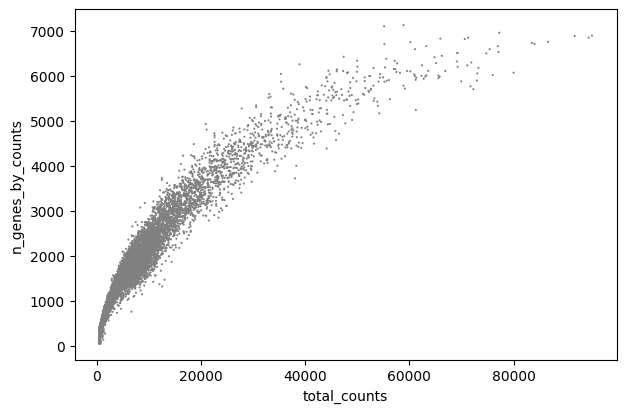

üîç ÿ¢ŸÖÿßÿ± Ÿæÿ≥ ÿßÿ≤ ŸÅ€åŸÑÿ™ÿ±⁄Øÿ∞ÿßÿ±€å ⁄©€åŸÅ€åÿ™ (QC):
üìå ÿ™ÿπÿØÿßÿØ ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß€å ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá Ÿæÿ≥ ÿßÿ≤ QC: 12,359
‚úÖ ÿ™ÿπÿØÿßÿØ ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ŸÖŸÜÿßÿ≥ÿ® Ÿà ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ‚ÄåŸáÿß€å ÿ¢ŸÖÿßÿ±€å ŸÇÿØÿ±ÿ™ŸÖŸÜÿØ ⁄©ÿßŸÅ€å ÿßÿ≥ÿ™.
üìå ÿ™ÿπÿØÿßÿØ ⁄òŸÜ‚ÄåŸáÿß€å ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá Ÿæÿ≥ ÿßÿ≤ ŸÅ€åŸÑÿ™ÿ±: 20,712
‚úÖ ÿ™ÿπÿØÿßÿØ ⁄òŸÜ‚ÄåŸáÿß ÿ®ÿßŸÑÿß Ÿà ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá‚Äå€å ŸæŸàÿ¥ÿ¥ ŸÖŸÜÿßÿ≥ÿ® ÿ®€åÿßŸÜ ⁄òŸÜ ÿßÿ≥ÿ™.
üìà ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ™ÿπÿØÿßÿØ ⁄òŸÜ ÿ®€åÿßŸÜ‚Äåÿ¥ÿØŸá ÿØÿ± Ÿáÿ± ÿ≥ŸÑŸàŸÑ: 1610.1
‚úÖ ŸÖŸÇÿØÿßÿ± ŸÖÿ™ÿπÿßÿØŸÑ€å ÿßÿ≤ ⁄òŸÜ‚ÄåŸáÿß€å ŸÅÿπÿßŸÑ ÿØ€åÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ.
üß¨ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ counts ÿØÿ± Ÿáÿ± ÿ≥ŸÑŸàŸÑ: 7030.6
‚úÖ ŸÖ€åÿ≤ÿßŸÜ ŸÖŸÜÿßÿ≥ÿ® ÿßÿ≤ transcriptŸáÿß ÿØÿ± ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ÿ¥ŸÜÿßÿ≥ÿß€å€å ÿ¥ÿØŸá ÿßÿ≥ÿ™.
üî¨ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿØÿ±ÿµÿØ ÿ®€åÿßŸÜ ⁄òŸÜ‚ÄåŸáÿß€å ŸÖ€åÿ™Ÿà⁄©ŸÜÿØÿ±€åÿß€å€å: 2.98%
‚úÖ ÿØÿ±ÿµÿØ Ÿæÿß€å€åŸÜ ŸÖ€åÿ™Ÿà⁄©ŸÜÿØÿ±€å ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá‚Äå€å ⁄©€åŸÅ€åÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿßÿ≥ÿ™.


In [25]:

initial_cells = data.n_obs
initial_genes = data.n_vars

data.obs['n_genes'] = (data.X > 0).sum(1)

data.obs['n_counts'] = data.X.sum(1)

data.var['mt'] = data.var_names.str.startswith('MT-')

sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], inplace=True)

sc.pl.violin(data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(data, x='total_counts', y='n_genes_by_counts')

sc.pp.filter_cells(data, min_genes=200)      
sc.pp.filter_genes(data, min_cells=3)        

data = data[data.obs.pct_counts_mt < 10, :]

print("üîç ÿ¢ŸÖÿßÿ± Ÿæÿ≥ ÿßÿ≤ ŸÅ€åŸÑÿ™ÿ±⁄Øÿ∞ÿßÿ±€å ⁄©€åŸÅ€åÿ™ (QC):")

print(f"üìå ÿ™ÿπÿØÿßÿØ ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß€å ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá Ÿæÿ≥ ÿßÿ≤ QC: {data.n_obs:,}")
if data.n_obs < 1000:
    print("‚ö†Ô∏è ÿ™ÿπÿØÿßÿØ ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ŸÜÿ≥ÿ®ÿ™ÿßŸã ⁄©ŸÖ ÿßÿ≥ÿ™ÿõ ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿØÿßÿØŸá ÿ®€åÿ¥ÿ™ÿ± €åÿß ÿ®ÿ±ÿ±ÿ≥€å ÿπŸÑÿ™ ÿ≠ÿ∞ŸÅ ÿ®ÿßŸÑÿß ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥€åŸÖ.")
elif data.n_obs > 10000:
    print("‚úÖ ÿ™ÿπÿØÿßÿØ ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ŸÖŸÜÿßÿ≥ÿ® Ÿà ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ‚ÄåŸáÿß€å ÿ¢ŸÖÿßÿ±€å ŸÇÿØÿ±ÿ™ŸÖŸÜÿØ ⁄©ÿßŸÅ€å ÿßÿ≥ÿ™.")

print(f"üìå ÿ™ÿπÿØÿßÿØ ⁄òŸÜ‚ÄåŸáÿß€å ÿ®ÿßŸÇ€å‚ÄåŸÖÿßŸÜÿØŸá Ÿæÿ≥ ÿßÿ≤ ŸÅ€åŸÑÿ™ÿ±: {data.n_vars:,}")
if data.n_vars < 5000:
    print("‚ö†Ô∏è ÿ™ÿπÿØÿßÿØ ⁄òŸÜ‚ÄåŸáÿß ⁄©ŸÖ ÿßÿ≥ÿ™ÿõ ÿßÿ≠ÿ™ŸÖÿßŸÑÿßŸã ŸÅ€åŸÑÿ™ÿ± ÿÆ€åŸÑ€å ÿ≥ÿÆÿ™‚Äå⁄Ø€åÿ±ÿßŸÜŸá ÿ®ŸàÿØŸá €åÿß ÿØÿßÿØŸá ⁄©ŸÖ‚Äåÿ™ŸÜŸàÿπ ÿßÿ≥ÿ™.")
elif data.n_vars > 15000:
    print("‚úÖ ÿ™ÿπÿØÿßÿØ ⁄òŸÜ‚ÄåŸáÿß ÿ®ÿßŸÑÿß Ÿà ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá‚Äå€å ŸæŸàÿ¥ÿ¥ ŸÖŸÜÿßÿ≥ÿ® ÿ®€åÿßŸÜ ⁄òŸÜ ÿßÿ≥ÿ™.")

mean_genes = data.obs['n_genes_by_counts'].mean()
print(f"üìà ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ™ÿπÿØÿßÿØ ⁄òŸÜ ÿ®€åÿßŸÜ‚Äåÿ¥ÿØŸá ÿØÿ± Ÿáÿ± ÿ≥ŸÑŸàŸÑ: {mean_genes:.1f}")
if mean_genes < 1000:
    print("‚ö†Ô∏è ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿ®ÿÆÿ¥€å ÿßÿ≤ ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ÿ¢ÿ≥€åÿ®‚ÄåÿØ€åÿØŸá €åÿß ŸÜÿßŸÇÿµ ÿ®ÿßÿ¥ŸÜÿØ.")
elif mean_genes > 3000:
    print("‚ÑπÔ∏è ŸÖŸÇÿØÿßÿ± ÿ®ÿßŸÑÿß ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿ®Ÿá ÿØŸÑ€åŸÑ doublet €åÿß ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß€å ÿ™ÿ±⁄©€åÿ®€å ÿ®ÿßÿ¥ÿØ.")
else:
    print("‚úÖ ŸÖŸÇÿØÿßÿ± ŸÖÿ™ÿπÿßÿØŸÑ€å ÿßÿ≤ ⁄òŸÜ‚ÄåŸáÿß€å ŸÅÿπÿßŸÑ ÿØ€åÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ.")

mean_counts = data.obs['total_counts'].mean()
print(f"üß¨ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ counts ÿØÿ± Ÿáÿ± ÿ≥ŸÑŸàŸÑ: {mean_counts:.1f}")
if mean_counts < 2000:
    print("‚ö†Ô∏è ŸÖŸÇÿØÿßÿ± Ÿæÿß€å€åŸÜ ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá sequencing ⁄©ŸÖ‚ÄåÿπŸÖŸÇ €åÿß ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß€å ÿ∂ÿπ€åŸÅ ÿ®ÿßÿ¥ÿØ.")
else:
    print("‚úÖ ŸÖ€åÿ≤ÿßŸÜ ŸÖŸÜÿßÿ≥ÿ® ÿßÿ≤ transcriptŸáÿß ÿØÿ± ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ÿ¥ŸÜÿßÿ≥ÿß€å€å ÿ¥ÿØŸá ÿßÿ≥ÿ™.")

mean_mt = data.obs['pct_counts_mt'].mean()
print(f"üî¨ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿØÿ±ÿµÿØ ÿ®€åÿßŸÜ ⁄òŸÜ‚ÄåŸáÿß€å ŸÖ€åÿ™Ÿà⁄©ŸÜÿØÿ±€åÿß€å€å: {mean_mt:.2f}%")
if mean_mt > 10:
    print("‚ö†Ô∏è ŸÖ€åÿ≤ÿßŸÜ ŸÖ€åÿ™Ÿà⁄©ŸÜÿØÿ±€å ÿ®ÿßŸÑÿßÿ≥ÿ™ÿõ ÿßÿ≠ÿ™ŸÖÿßŸÑ Ÿàÿ¨ŸàÿØ ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß€å ŸÖÿ±ÿØŸá €åÿß ÿ™ÿ≠ÿ™ ÿßÿ≥ÿ™ÿ±ÿ≥ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ.")
elif mean_mt < 5:
    print("‚úÖ ÿØÿ±ÿµÿØ Ÿæÿß€å€åŸÜ ŸÖ€åÿ™Ÿà⁄©ŸÜÿØÿ±€å ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá‚Äå€å ⁄©€åŸÅ€åÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿßÿ≥ÿ™.")
else:
    print("‚ÑπÔ∏è ÿØÿ±ÿµÿØ ŸÖÿ™Ÿàÿ≥ÿ∑€å ÿßÿ≤ ŸÖ€åÿ™Ÿà⁄©ŸÜÿØÿ±€å ŸÖÿ¥ÿßŸáÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ ⁄©Ÿá ŸÇÿßÿ®ŸÑ ŸÇÿ®ŸàŸÑ ÿßÿ≥ÿ™.")



In [26]:
final_cells = data.n_obs
final_genes = data.n_vars

removed_cells = initial_cells - final_cells
removed_genes = initial_genes - final_genes
cell_removal_percent = (removed_cells / initial_cells) * 100
gene_removal_percent = (removed_genes / initial_genes) * 100

print("‚úÖ ÿ™ÿ∫€å€åÿ±ÿßÿ™ Ÿæÿ≥ ÿßÿ≤ QC:")
print(f"ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ŸÇÿ®ŸÑ: {initial_cells}   ÿ®ÿπÿØ: {final_cells}   ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸá: {removed_cells}")
print(f"⁄òŸÜ‚ÄåŸáÿß ŸÇÿ®ŸÑ:   {initial_genes}   ÿ®ÿπÿØ: {final_genes}   ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸá: {removed_genes}")

print("\nüß† ÿ™ÿ≠ŸÑ€åŸÑ:")

if cell_removal_percent < 5:
    print(f"ÿßÿ≤ {initial_cells:,} ÿ≥ŸÑŸàŸÑÿå ÿ™ŸÜŸáÿß {removed_cells:,} ({cell_removal_percent:.1f}%) ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØÿõ "
          f"ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá‚Äå€å ⁄©€åŸÅ€åÿ™ ÿ®ÿ≥€åÿßÿ± ÿÆŸàÿ® ÿØÿßÿØŸá‚ÄåŸáÿßÿ≥ÿ™.")
elif cell_removal_percent < 15:
    print(f"{removed_cells:,} ÿ≥ŸÑŸàŸÑ ({cell_removal_percent:.1f}%) ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØÿõ ÿß€åŸÜ ŸÖ€åÿ≤ÿßŸÜ ÿ≠ÿ∞ŸÅ ÿ®ÿ±ÿß€å scRNA-seq ÿ∑ÿ®€åÿπ€å ÿßÿ≥ÿ™.")
else:
    print(f"‚ö†Ô∏è Ÿáÿ¥ÿØÿßÿ±: {removed_cells:,} ÿ≥ŸÑŸàŸÑ (ÿ≠ÿØŸàÿØ {cell_removal_percent:.1f}%) ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØ. ÿßÿ≠ÿ™ŸÖÿßŸÑ Ÿàÿ¨ŸàÿØ ŸÜŸà€åÿ≤ €åÿß ÿ¢ŸÑŸàÿØ⁄Ø€å ÿ®ÿßŸÑÿß Ÿáÿ≥ÿ™.")

if gene_removal_percent < 20:
    print(f"{removed_genes:,} ⁄òŸÜ ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØ ({gene_removal_percent:.1f}%)ÿõ ÿ≠ÿ∞ŸÅ ⁄òŸÜ‚ÄåŸáÿß€å ⁄©ŸÖ‚Äåÿ®€åÿßŸÜ ÿØÿ± ÿß€åŸÜ ÿ≥ÿ∑ÿ≠ ÿ®ÿ≥€åÿßÿ± ÿÆŸàÿ® ÿßÿ≥ÿ™.")
elif gene_removal_percent < 50:
    print(f"{removed_genes:,} ⁄òŸÜ ({gene_removal_percent:.1f}%) ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØÿõ ÿß€åŸÜ ŸÖÿπŸÖŸàŸÑÿßŸã ÿ®Ÿá ÿÆÿßÿ∑ÿ± ⁄òŸÜ‚ÄåŸáÿß€å ⁄©ŸÖ‚Äåÿ®€åÿßŸÜ ÿßÿ≥ÿ™.")
else:
    print(f"‚ö†Ô∏è Ÿáÿ¥ÿØÿßÿ±: ÿ®€åÿ¥ ÿßÿ≤ ŸÜ€åŸÖ€å ÿßÿ≤ ⁄òŸÜ‚ÄåŸáÿß ({removed_genes:,} ⁄òŸÜÿå {gene_removal_percent:.1f}%) ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØ. "
          f"ÿ¥ÿß€åÿØ Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ŸÅ€åŸÑÿ™ÿ± ÿ®€åÿ¥ ÿßÿ≤ ÿ≠ÿØ ÿ≥ÿÆÿ™‚Äå⁄Ø€åÿ±ÿßŸÜŸá ÿ®ŸàÿØŸá ÿ®ÿßÿ¥ŸÜÿØ.")

‚úÖ ÿ™ÿ∫€å€åÿ±ÿßÿ™ Ÿæÿ≥ ÿßÿ≤ QC:
ÿ≥ŸÑŸàŸÑ‚ÄåŸáÿß ŸÇÿ®ŸÑ: 12816   ÿ®ÿπÿØ: 12359   ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸá: 457
⁄òŸÜ‚ÄåŸáÿß ŸÇÿ®ŸÑ:   33538   ÿ®ÿπÿØ: 20712   ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸá: 12826

üß† ÿ™ÿ≠ŸÑ€åŸÑ:
ÿßÿ≤ 12,816 ÿ≥ŸÑŸàŸÑÿå ÿ™ŸÜŸáÿß 457 (3.6%) ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØÿõ ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá‚Äå€å ⁄©€åŸÅ€åÿ™ ÿ®ÿ≥€åÿßÿ± ÿÆŸàÿ® ÿØÿßÿØŸá‚ÄåŸáÿßÿ≥ÿ™.
12,826 ⁄òŸÜ (38.2%) ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸÜÿØÿõ ÿß€åŸÜ ŸÖÿπŸÖŸàŸÑÿßŸã ÿ®Ÿá ÿÆÿßÿ∑ÿ± ⁄òŸÜ‚ÄåŸáÿß€å ⁄©ŸÖ‚Äåÿ®€åÿßŸÜ ÿßÿ≥ÿ™.


In [27]:
data.obs

condition batch  n_genes  n_counts  n_genes_by_counts  \
AAACCTGAGACTAGGC-1-N    normal     N     1359      3587               1359   
AAACCTGAGGACAGAA-1-N    normal     N      510      1003                510   
AAACCTGAGGATGTAT-1-N    normal     N     1893      7536               1893   
AAACCTGCAAGAGGCT-1-N    normal     N     2595     10366               2595   
AAACCTGGTAGCTTGT-1-N    normal     N      734      1628                734   
...                        ...   ...      ...       ...                ...   
TTTGTCATCGAGAACG-1-C    cancer     C     1357      5598               1357   
TTTGTCATCGCCAGCA-1-C    cancer     C     2486     12103               2486   
TTTGTCATCGGCGCAT-1-C    cancer     C      745      1665                745   
TTTGTCATCGGTCTAA-1-C    cancer     C     1148      3618               1148   
TTTGTCATCTACCAGA-1-C    cancer     C     1094      2687               1094   

                      log1p_n_genes_by_counts  total_counts  \
AAACCTGAGACTAGGC-1-N                 7.215240          3587   
AAACCTGAGGACAGAA-1-N                 6.236370          1003   
AAACCTGAGGATGTAT-1-N                 7.546446          7536   
AAACCTGCAAGAGGCT-1-N                 7.861727         10366   
AAACCTGGTAGCTTGT-1-N                 6.599870          1628   
...                                       ...           ...   
TTTGTCATCGAGAACG-1-C                 7.213768          5598   
TTTGTCATCGCCAGCA-1-C                 7.818832         12103   
TTTGTCATCGGCGCAT-1-C                 6.614726          1665   
TTTGTCATCGGTCTAA-1-C                 7.046647          3618   
TTTGTCATCTACCAGA-1-C                 6.998510          2687   

                      log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCTGAGACTAGGC-1-N            8.185350                   36.437134   
AAACCTGAGGACAGAA-1-N            6.911747                   39.481555   
AAACCTGAGGATGTAT-1-N            8.927580                   37.460191   
AAACCTGCAAGAGGCT-1-N            9.246383                   31.207795   
AAACCTGGTAGCTTGT-1-N            7.395722                   37.837838   
...                                  ...                         ...   
TTTGTCATCGAGAACG-1-C            8.630343                   43.408360   
TTTGTCATCGCCAGCA-1-C            9.401291                   36.610758   
TTTGTCATCGGCGCAT-1-C            7.418181                   36.096096   
TTTGTCATCGGTCTAA-1-C            8.193953                   45.411830   
TTTGTCATCTACCAGA-1-C            7.896553                   34.462226   

                      pct_counts_in_top_100_genes  \
AAACCTGAGACTAGGC-1-N                    50.683022   
AAACCTGAGGACAGAA-1-N                    53.738784   
AAACCTGAGGATGTAT-1-N                    51.167728   
AAACCTGCAAGAGGCT-1-N                    45.388771   
AAACCTGGTAGCTTGT-1-N                    51.965602   
...                                           ...   
TTTGTCATCGAGAACG-1-C                    60.432297   
TTTGTCATCGCCAGCA-1-C                    53.044700   
TTTGTCATCGGCGCAT-1-C                    49.609610   
TTTGTCATCGGTCTAA-1-C                    55.472637   
TTTGTCATCTACCAGA-1-C                    46.371418   

                      pct_counts_in_top_200_genes  \
AAACCTGAGACTAGGC-1-N                    61.834402   
AAACCTGAGGACAGAA-1-N                    69.092722   
AAACCTGAGGATGTAT-1-N                    63.468684   
AAACCTGCAAGAGGCT-1-N                    59.097048   
AAACCTGGTAGCTTGT-1-N                    66.400491   
...                                           ...   
TTTGTCATCGAGAACG-1-C                    71.882815   
TTTGTCATCGCCAGCA-1-C                    64.950839   
TTTGTCATCGGCGCAT-1-C                    64.024024   
TTTGTCATCGGTCTAA-1-C                    66.583748   
TTTGTCATCTACCAGA-1-C                    59.955341   

                      pct_counts_in_top_500_genes  total_counts_mt  \
AAACCTGAGACTAGGC-1-N                    76.052411              287   
AAACCTGAGGACAGAA-1-N                    99.00299

Normalize

In [28]:
sc.pp.normalize_total(data, target_sum=1e4)

sc.pp.log1p(data)

sc.pp.highly_variable_genes(data, n_top_genes=2000, subset=True)

sc.pp.scale(data, max_value=10)


c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCA

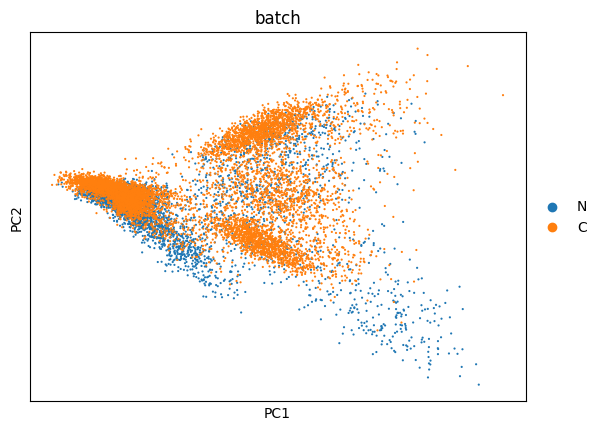

In [29]:
sc.tl.pca(data, svd_solver='arpack' , n_comps=30)
sc.pl.pca(data, color='batch')  


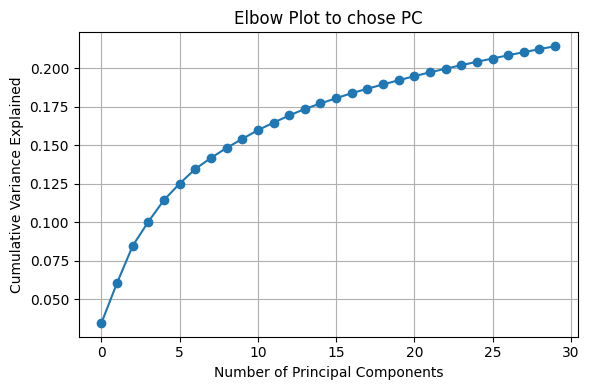

üìå ÿ™ÿ≠ŸÑ€åŸÑ Elbow Plot:
ÿß€åŸÜ ŸÜŸÖŸàÿØÿßÿ± ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá ÿ®ÿß ÿßŸÅÿ≤ÿß€åÿ¥ ÿ™ÿπÿØÿßÿØ ŸÖÿ§ŸÑŸÅŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€åÿå ⁄ÜŸá ŸÖ€åÿ≤ÿßŸÜ ÿßÿ≤ Ÿàÿßÿ±€åÿßŸÜÿ≥ ⁄©ŸÑ ÿØÿßÿØŸá ŸæŸàÿ¥ÿ¥ ÿØÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ.
ŸÖÿπŸÖŸàŸÑÿßŸã ŸÜŸÇÿ∑Ÿá‚Äåÿß€å ⁄©Ÿá ŸÖŸÜÿ≠ŸÜ€å ÿµÿßŸÅ ŸÖ€å‚Äåÿ¥ŸàÿØ (ŸÜŸÇÿ∑Ÿá ÿ≤ÿßŸÜŸà)ÿå ÿ®Ÿáÿ™ÿ±€åŸÜ ÿßŸÜÿ™ÿÆÿßÿ® ÿ®ÿ±ÿß€å ÿ™ÿπÿØÿßÿØ PC ÿßÿ≥ÿ™.
ÿØÿ± ÿ®€åÿ¥ÿ™ÿ± ÿ™ÿ≠ŸÑ€åŸÑ‚ÄåŸáÿßÿå ÿß⁄Øÿ± ŸÖÿ´ŸÑÿßŸã ÿ®ÿß 20 €åÿß 30 PC ÿ≠ÿØŸàÿØ 80 ÿ™ÿß 90 ÿØÿ±ÿµÿØ Ÿàÿßÿ±€åÿßŸÜÿ≥ ŸæŸàÿ¥ÿ¥ ÿØÿßÿØŸá ÿ¥ŸàÿØÿå ÿ¢ŸÜ ÿ™ÿπÿØÿßÿØ ⁄©ÿßŸÅ€å ÿßÿ≥ÿ™.
‚úîÔ∏è ÿØÿ± ÿßÿØÿßŸÖŸá ŸÖ€å‚Äåÿ™ŸàŸÜ€å ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€å ⁄©Ÿá ŸÖÿ´ŸÑÿßŸã ÿ™ÿß PC=30 ⁄ÜŸÜÿØ ÿØÿ±ÿµÿØ ÿßÿ≤ Ÿàÿßÿ±€åÿßŸÜÿ≥ ŸæŸàÿ¥ÿ¥ ÿØÿßÿØŸá ÿ¥ÿØŸá:


In [30]:


explained_variance = data.uns['pca']['variance_ratio']

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Elbow Plot to chose PC')
plt.grid(True)
plt.tight_layout()
plt.show()
print("üìå ÿ™ÿ≠ŸÑ€åŸÑ Elbow Plot:")
print("ÿß€åŸÜ ŸÜŸÖŸàÿØÿßÿ± ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá ÿ®ÿß ÿßŸÅÿ≤ÿß€åÿ¥ ÿ™ÿπÿØÿßÿØ ŸÖÿ§ŸÑŸÅŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€åÿå ⁄ÜŸá ŸÖ€åÿ≤ÿßŸÜ ÿßÿ≤ Ÿàÿßÿ±€åÿßŸÜÿ≥ ⁄©ŸÑ ÿØÿßÿØŸá ŸæŸàÿ¥ÿ¥ ÿØÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ.")
print("ŸÖÿπŸÖŸàŸÑÿßŸã ŸÜŸÇÿ∑Ÿá‚Äåÿß€å ⁄©Ÿá ŸÖŸÜÿ≠ŸÜ€å ÿµÿßŸÅ ŸÖ€å‚Äåÿ¥ŸàÿØ (ŸÜŸÇÿ∑Ÿá ÿ≤ÿßŸÜŸà)ÿå ÿ®Ÿáÿ™ÿ±€åŸÜ ÿßŸÜÿ™ÿÆÿßÿ® ÿ®ÿ±ÿß€å ÿ™ÿπÿØÿßÿØ PC ÿßÿ≥ÿ™.")
print("ÿØÿ± ÿ®€åÿ¥ÿ™ÿ± ÿ™ÿ≠ŸÑ€åŸÑ‚ÄåŸáÿßÿå ÿß⁄Øÿ± ŸÖÿ´ŸÑÿßŸã ÿ®ÿß 20 €åÿß 30 PC ÿ≠ÿØŸàÿØ 80 ÿ™ÿß 90 ÿØÿ±ÿµÿØ Ÿàÿßÿ±€åÿßŸÜÿ≥ ŸæŸàÿ¥ÿ¥ ÿØÿßÿØŸá ÿ¥ŸàÿØÿå ÿ¢ŸÜ ÿ™ÿπÿØÿßÿØ ⁄©ÿßŸÅ€å ÿßÿ≥ÿ™.")
print("‚úîÔ∏è ÿØÿ± ÿßÿØÿßŸÖŸá ŸÖ€å‚Äåÿ™ŸàŸÜ€å ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€å ⁄©Ÿá ŸÖÿ´ŸÑÿßŸã ÿ™ÿß PC=30 ⁄ÜŸÜÿØ ÿØÿ±ÿµÿØ ÿßÿ≤ Ÿàÿßÿ±€åÿßŸÜÿ≥ ŸæŸàÿ¥ÿ¥ ÿØÿßÿØŸá ÿ¥ÿØŸá:")

UMAP Ÿà Neighborhood Graph

c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


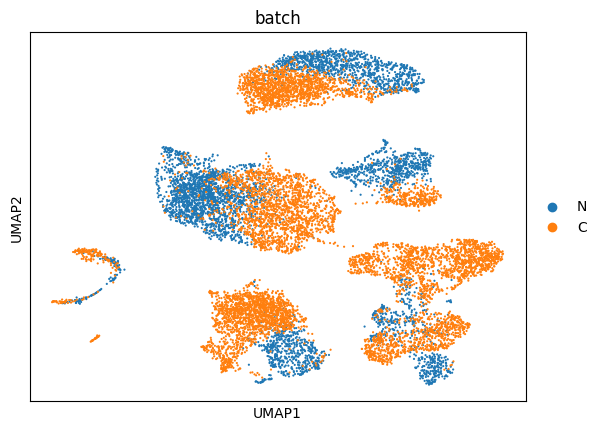

In [31]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=30)
sc.tl.umap(data)
sc.pl.umap(data, color='batch')  


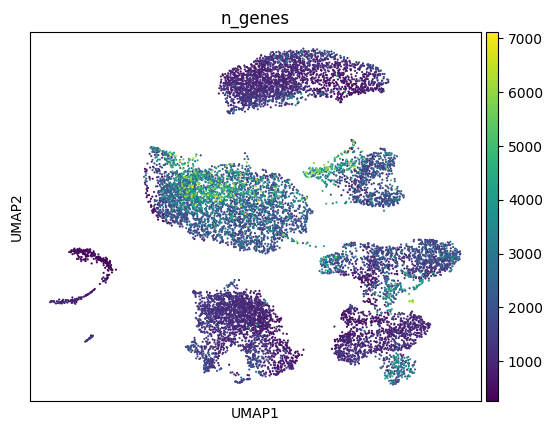

In [32]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=30)
sc.tl.umap(data)
sc.pl.umap(data, color='n_genes')  

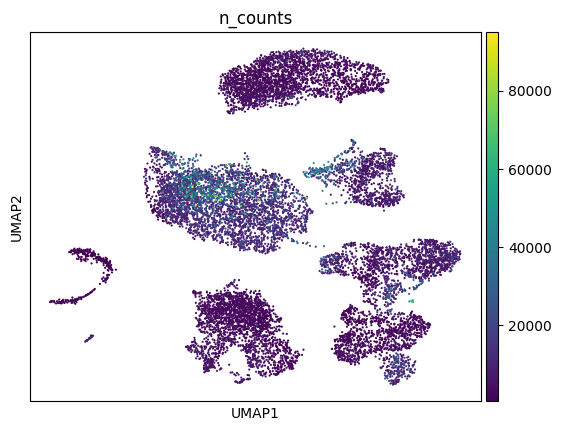

In [33]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=30)
sc.tl.umap(data)
sc.pl.umap(data, color='n_counts')  

DEG

c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


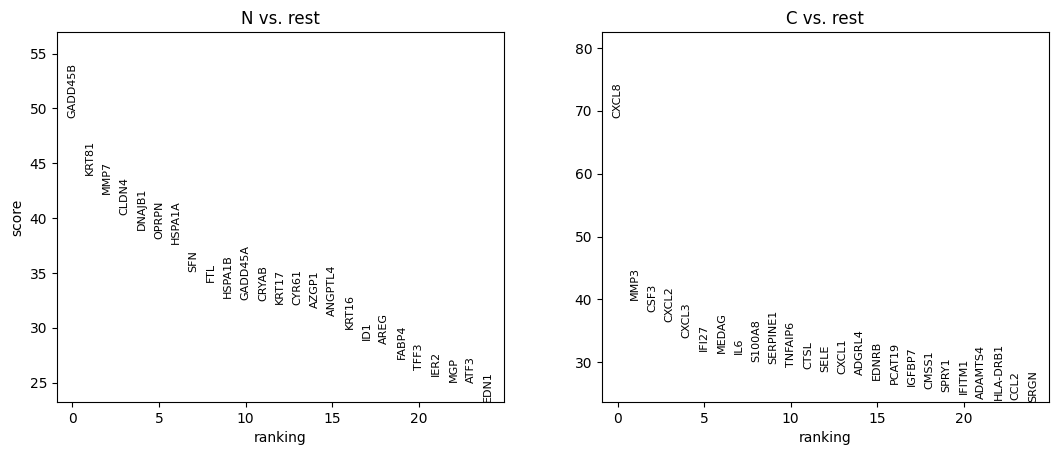

In [34]:
sc.tl.rank_genes_groups(data, groupby='batch', method='t-test')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)


c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\sahar\OneDrive\Desktop\New folder\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


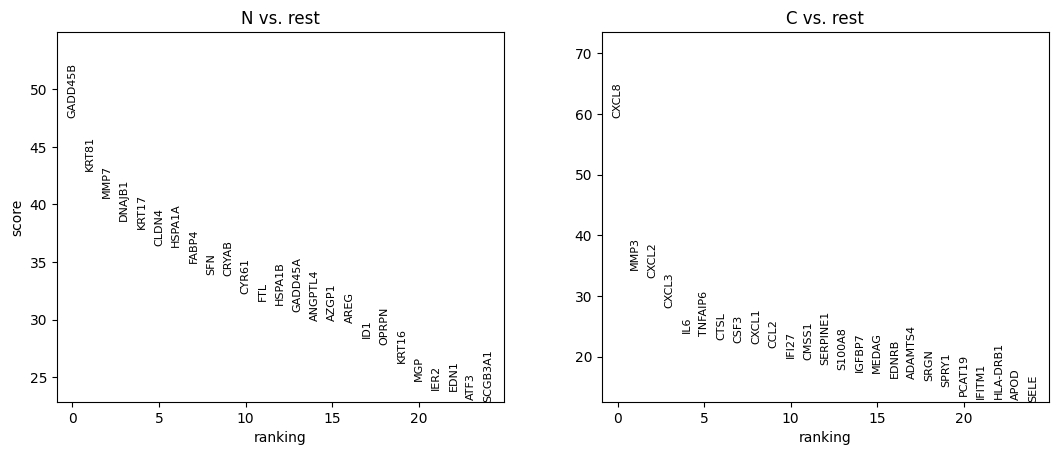

In [35]:
sc.tl.rank_genes_groups(data, groupby='batch', method='wilcoxon')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)


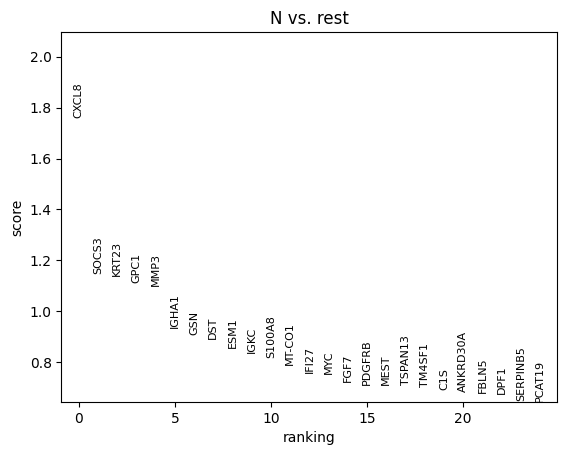

In [36]:
sc.tl.rank_genes_groups(data, groupby='batch', method='logreg')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)
